# 📚 Scholar.py — Google Scholar Data Extraction

Upload `scholar.py` to Colab, then run these cells.

**Features:**
- Profile & citation metrics
- Publication lists with pagination
- Citation history (scholar-level & per-article)
- Compare multiple scholars
- Predict future h-index
- Co-author network analysis & visualization

## 0. Setup

In [ ]:
# Install dependencies
!pip install requests beautifulsoup4 pandas numpy networkx matplotlib -q

In [ ]:
# Upload scholar.py — run this cell and select the file
from google.colab import files
uploaded = files.upload()  # select scholar.py

Saving scholar.py to scholar.py


In [ ]:
# Import everything
from scholar import *
import pandas as pd
import matplotlib.pyplot as plt
import time

print("✅ scholar.py loaded successfully")

✅ scholar.py loaded successfully


## 1. Set Your Scholar ID

Find your Google Scholar ID from your profile URL:  
`https://scholar.google.com/citations?user=XXXXXXX` → the `XXXXXXX` part is your ID.

In [ ]:
# ═══════════════════════════════════════════════
# 🔧 CHANGE THIS to your own Scholar ID
# ═══════════════════════════════════════════════
SCHOLAR_ID = "QHp1Ly8AAAAJ"


## 2. Profile & Metrics

In [ ]:
# ── Quick summary ────────────────────────────────
print(scholar_summary(SCHOLAR_ID))

Name:        Zhanyi Ding
Affiliation: New York University
Scholar ID:  QHp1Ly8AAAAJ
Total cites: 57
h-index:     3
i10-index:   2
Fields:      Machine Learning, Deep Learning
Homepage:    
Coauthors:   2


In [ ]:
# ── Full profile dict ────────────────────────────
profile = get_profile(SCHOLAR_ID)

for k, v in profile.items():
    if k != "coauthors":
        print(f"  {k:16s}: {v}")
print(f"  {'coauthors':16s}: {len(profile['coauthors'])} listed")

  id              : QHp1Ly8AAAAJ
  name            : Zhanyi Ding
  affiliation     : New York University
  total_cites     : 57
  h_index         : 3
  i10_index       : 2
  fields          : ['Machine Learning', 'Deep Learning']
  homepage        : 
  available       : None
  not_available   : None
  coauthors       : 2 listed


In [ ]:
# ── Profile coauthors table ──────────────────────
if profile["coauthors"]:
    pd.DataFrame(profile["coauthors"])

## 3. Publications

In [ ]:
# ── Get all publications ─────────────────────────
pubs = get_publications(SCHOLAR_ID)
print(f"Total publications: {len(pubs)}")
pubs.head(15)

Total publications: 5


,title,author,journal,number,cites,year,cid,pubid
0,Trade-offs between machine learning and deep l...,"Z Ding, Z Wang, Y Zhang, Y Cao, Y Liu, X Shen,...",Scientific Reports,"15 (1), 14497",38,2025,8816176070177112035,u5HHmVD_uO8C
1,Employing machine learning and deep learning m...,"Y Zhang, Z Wang, Z Ding, Y Tian, J Dai, X Shen...",Computation,"13 (8), 186",16,2025,16038277816579133793,u-x6o8ySG0sC
2,A comparative analysis of deep learning and ma...,"S Xu, Z Ding, Z Wei, CP Yang, Y Li, X Chen, H ...",,2025 6th International Conference on Computer ...,3,2025,17886611124466557159,9yKSN-GCB0IC
3,Beyond keywords: modeling the semantic complex...,"S Xu, Z Ding, Z Wei, CP Yang, Y Li, X Chen, H ...",Journal of Computational Social Science,"9 (2), 29",0,2026,,qjMakFHDy7sC
4,Feature Engineering in the Transformer Era: A ...,"Z Ding, Z Wei, C Yang, H Wang, S Xu, Y Li, X Chen",Preprints,,0,2025,,2osOgNQ5qMEC


In [ ]:
# ── Sort by year ─────────────────────────────────
pubs_by_year = get_publications(SCHOLAR_ID, sortby="year")
pubs_by_year[["title", "year", "cites"]].head(10)

,title,year,cites
0,Beyond keywords: modeling the semantic complex...,2026,0
1,Feature Engineering in the Transformer Era: A ...,2025,0
2,A comparative analysis of deep learning and ma...,2025,3
3,Employing machine learning and deep learning m...,2025,16
4,Trade-offs between machine learning and deep l...,2025,38


In [ ]:
# ── Quick stats ──────────────────────────────────
print(f"Number of articles:          {get_num_articles(SCHOLAR_ID)}")
print(f"Distinct journals:           {get_num_distinct_journals(SCHOLAR_ID)}")
print(f"Oldest article year:         {get_oldest_article(SCHOLAR_ID)}")
print(f"Publications in top journals: {get_num_top_journals(SCHOLAR_ID)}")

Number of articles:          5
Distinct journals:           5
Oldest article year:         2025
Publications in top journals: 0


In [ ]:
# ── Top cited publications ───────────────────────
top = pubs.nlargest(10, "cites")[["title", "journal", "cites", "year"]]
top.style.bar(subset=["cites"], color="#4CAF50")

,title,journal,cites,year
0,Trade-offs between machine learning and deep learning for mental illness detection on social media,Scientific Reports,38,2025
1,Employing machine learning and deep learning models for mental illness detection,Computation,16,2025
2,A comparative analysis of deep learning and machine learning approaches for spam identification on telegram,,3,2025
3,Beyond keywords: modeling the semantic complexity of deceptive communication on instant messaging platforms,Journal of Computational Social Science,0,2026
4,Feature Engineering in the Transformer Era: A Controlled Study on Toxic Comment Classification,Preprints,0,2025


## 4. Publication Details

In [ ]:
# ── Pick the most-cited publication ───────────────
top_pub = pubs.nlargest(1, "cites").iloc[0]
pub_id = top_pub["pubid"]
print(f"Title: {top_pub['title']}")
print(f"Pub ID: {pub_id}")
print(f"Scholar URL: {get_article_scholar_url(SCHOLAR_ID, pub_id)}")

time.sleep(1)  # rate limit courtesy

Title: Trade-offs between machine learning and deep learning for mental illness detection on social media
Pub ID: u5HHmVD_uO8C
Scholar URL: https://scholar.google.com/citations?view_op=view_citation&hl=en&user=QHp1Ly8AAAAJ&citation_for_view=QHp1Ly8AAAAJ:u5HHmVD_uO8C


In [ ]:
# ── Abstract ──────────────────────────────────────
abstract = get_publication_abstract(SCHOLAR_ID, pub_id)
print("Abstract:")
print(abstract if abstract else "(not available)")

time.sleep(1)

Abstract:
Social media platforms provide valuable insights into mental health trends by capturing user-generated discussions on conditions such as depression, anxiety, and suicidal ideation. Machine learning (ML) and deep learning (DL) models have been increasingly applied to classify mental health conditions from textual data, but selecting the most effective model involves trade-offs in accuracy, interpretability, and computational efficiency. This study evaluates multiple ML models, including logistic regression, random forest, and LightGBM, alongside DL architectures such as ALBERT and Gated Recurrent Units (GRUs), for both binary and multi-class classification of mental health conditions. Our findings indicate that ML and DL models achieve comparable classification performance on medium-sized datasets, with ML models offering greater interpretability through variable importance scores, while DL models are …


In [ ]:
# ── Full metadata ─────────────────────────────────
meta = get_publication_data_extended(SCHOLAR_ID, pub_id)
for k, v in meta.items():
    print(f"  {k}: {v}")

time.sleep(1)

  Authors: Zhanyi Ding, Zhongyan Wang, Yeyubei Zhang, Yuchen Cao, Yunchong Liu, Xiaorui Shen, Yexin Tian, Jianglai Dai
  Publication date: 2025/4/25
  Journal: Scientific Reports
  Volume: 15
  Issue: 1
  Pages: 14497
  Publisher: Nature Publishing Group UK
  Description: Social media platforms provide valuable insights into mental health trends by capturing user-generated discussions on conditions such as depression, anxiety, and suicidal ideation. Machine learning (ML) and deep learning (DL) models have been increasingly applied to classify mental health conditions from textual data, but selecting the most effective model involves trade-offs in accuracy, interpretability, and computational efficiency. This study evaluates multiple ML models, including logistic regression, random forest, and LightGBM, alongside DL architectures such as ALBERT and Gated Recurrent Units (GRUs), for both binary and multi-class classification of mental health conditions. Our findings indicate that ML and 

In [ ]:
# ── Publication date & URL ────────────────────────
print(f"Publication date: {get_publication_date(SCHOLAR_ID, pub_id)}")
time.sleep(1)
print(f"Full-text URL:    {get_publication_url(SCHOLAR_ID, pub_id)}")

Publication date: 2025/4/25
Full-text URL:    https://www.nature.com/articles/s41598-025-99167-6


In [ ]:
# ── Complete author list (with initials) ──────────
authors = get_complete_authors(SCHOLAR_ID, pub_id)
print(f"Authors: {authors}")

Authors: Z Ding, Z Wang, Y Zhang, Y Cao, Y Liu, X Shen, Y Tian, J Dai


## 5. Citation History

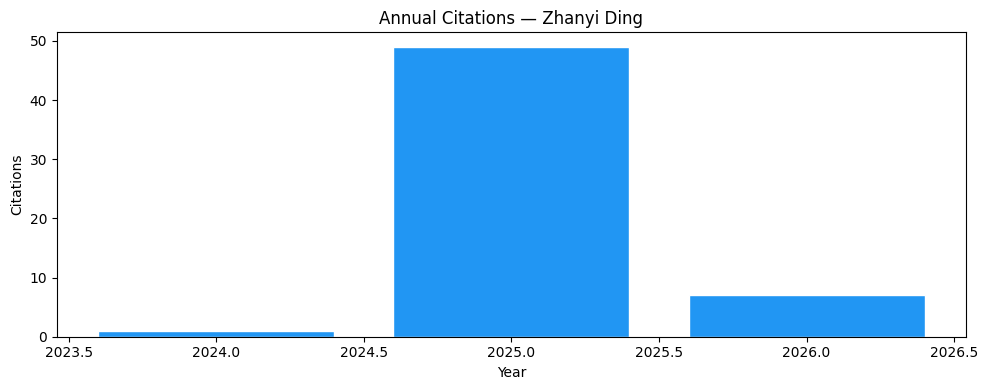

,year,cites
0,2024,1
1,2025,49
2,2026,7


In [ ]:
# ── Scholar-level citation history ────────────────
hist = get_citation_history(SCHOLAR_ID)

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(hist["year"], hist["cites"], color="#2196F3", edgecolor="white")
ax.set_xlabel("Year")
ax.set_ylabel("Citations")
ax.set_title(f"Annual Citations — {profile['name']}")
plt.tight_layout()
plt.show()
hist

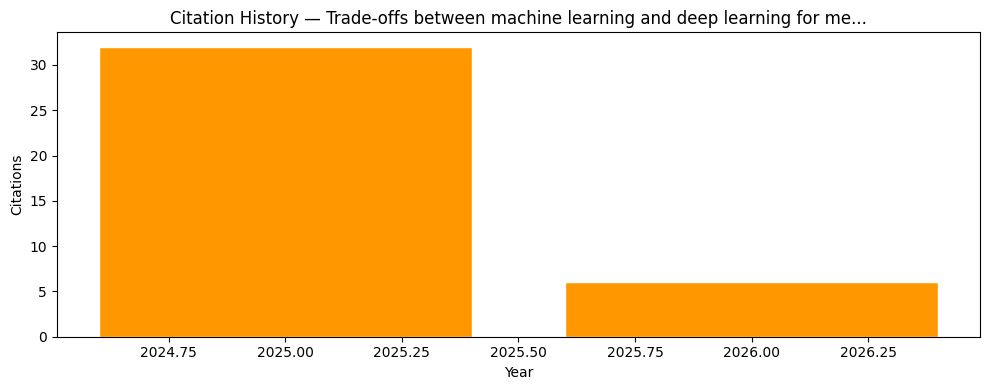

,year,cites,pubid
0,2025,32,u5HHmVD_uO8C
1,2026,6,u5HHmVD_uO8C


In [ ]:
# ── Per-article citation history ──────────────────
time.sleep(1)
article_hist = get_article_cite_history(SCHOLAR_ID, pub_id)

fig, ax = plt.subplots(figsize=(10, 4))
ax.bar(article_hist["year"], article_hist["cites"], color="#FF9800", edgecolor="white")
ax.set_xlabel("Year")
ax.set_ylabel("Citations")
ax.set_title(f"Citation History — {top_pub['title'][:60]}...")
plt.tight_layout()
plt.show()
article_hist

## 6. Author Position Analysis

In [ ]:
# ── Where does the author appear in author lists? ─
positions = author_position(pubs["author"], profile["name"])

# Summary
valid = positions.dropna(subset=["position"])
print(f"Found in {len(valid)}/{len(positions)} author lists")
if len(valid) > 0:
    print(f"First author:  {(valid['position'] == 1).sum()} times")
    print(f"Last author:   {(valid['position'] == valid['n_authors']).sum()} times")
    print(f"Mean position: {valid['position_normalized'].mean():.2f} (0=first, 1=last)")

positions.head(10)

Found in 5/5 author lists
First author:  2 times
Last author:   0 times
Mean position: 0.12 (0=first, 1=last)


,authors,position,n_authors,position_normalized
0,"Z Ding, Z Wang, Y Zhang, Y Cao, Y Liu, X Shen,...",1,8,0.000000
1,"Y Zhang, Z Wang, Z Ding, Y Tian, J Dai, X Shen...",3,8,0.285714
2,"S Xu, Z Ding, Z Wei, CP Yang, Y Li, X Chen, H ...",2,7,0.166667
3,"S Xu, Z Ding, Z Wei, CP Yang, Y Li, X Chen, H ...",2,7,0.166667
4,"Z Ding, Z Wei, C Yang, H Wang, S Xu, Y Li, X Chen",1,7,0.000000


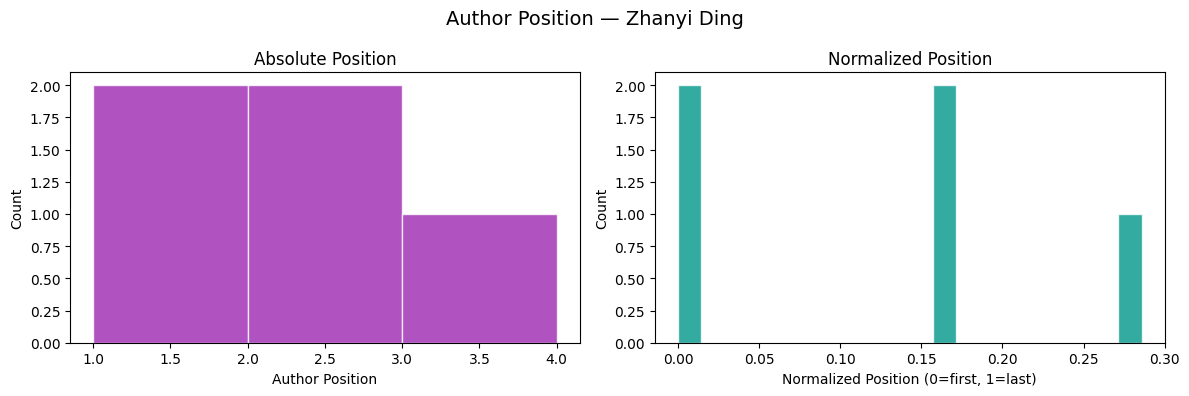

In [ ]:
# ── Visualize position distribution ───────────────
if len(valid) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].hist(valid["position"].dropna(), bins=range(1, int(valid["position"].max()) + 2),
                 color="#9C27B0", edgecolor="white", alpha=0.8)
    axes[0].set_xlabel("Author Position")
    axes[0].set_ylabel("Count")
    axes[0].set_title("Absolute Position")

    axes[1].hist(valid["position_normalized"].dropna(), bins=20,
                 color="#009688", edgecolor="white", alpha=0.8)
    axes[1].set_xlabel("Normalized Position (0=first, 1=last)")
    axes[1].set_ylabel("Count")
    axes[1].set_title("Normalized Position")

    plt.suptitle(f"Author Position — {profile['name']}", fontsize=14)
    plt.tight_layout()
    plt.show()

## 7. Predict h-index

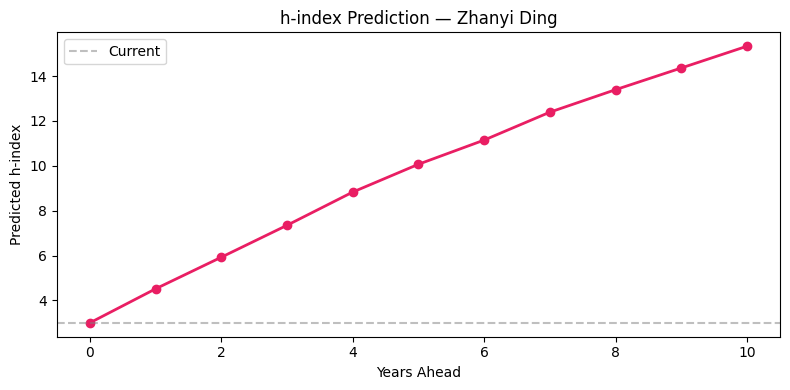

,years_ahead,h_index
0,0,3.000000
1,1,4.516053
2,2,5.925369
3,3,7.348855
4,4,8.829190
5,5,10.069515
6,6,11.147470
7,7,12.391716
8,8,13.393978
9,9,14.361220


In [ ]:
# ── 10-year h-index prediction (Acuna et al.) ────
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("always")
    prediction = predict_h_index(SCHOLAR_ID)

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(prediction["years_ahead"], prediction["h_index"],
        marker="o", color="#E91E63", linewidth=2)
ax.axhline(y=profile["h_index"], color="gray", linestyle="--", alpha=0.5, label="Current")
ax.set_xlabel("Years Ahead")
ax.set_ylabel("Predicted h-index")
ax.set_title(f"h-index Prediction — {profile['name']}")
ax.legend()
plt.tight_layout()
plt.show()

prediction

## 8. Co-author Network

In [ ]:
# ── Get co-author network ────────────────────────
print("⏳ Building co-author network (may take 30-60s)...")
network = get_coauthors(SCHOLAR_ID, n_coauthors=5, n_deep=1)
print(f"✅ {len(network)} co-author connections found")
network.head(15)

⏳ Building co-author network (may take 30-60s)...
✅ 2 co-author connections found


,author,coauthors
0,Zhanyi Ding,About Scholar
1,Zhanyi Ding,Search Help


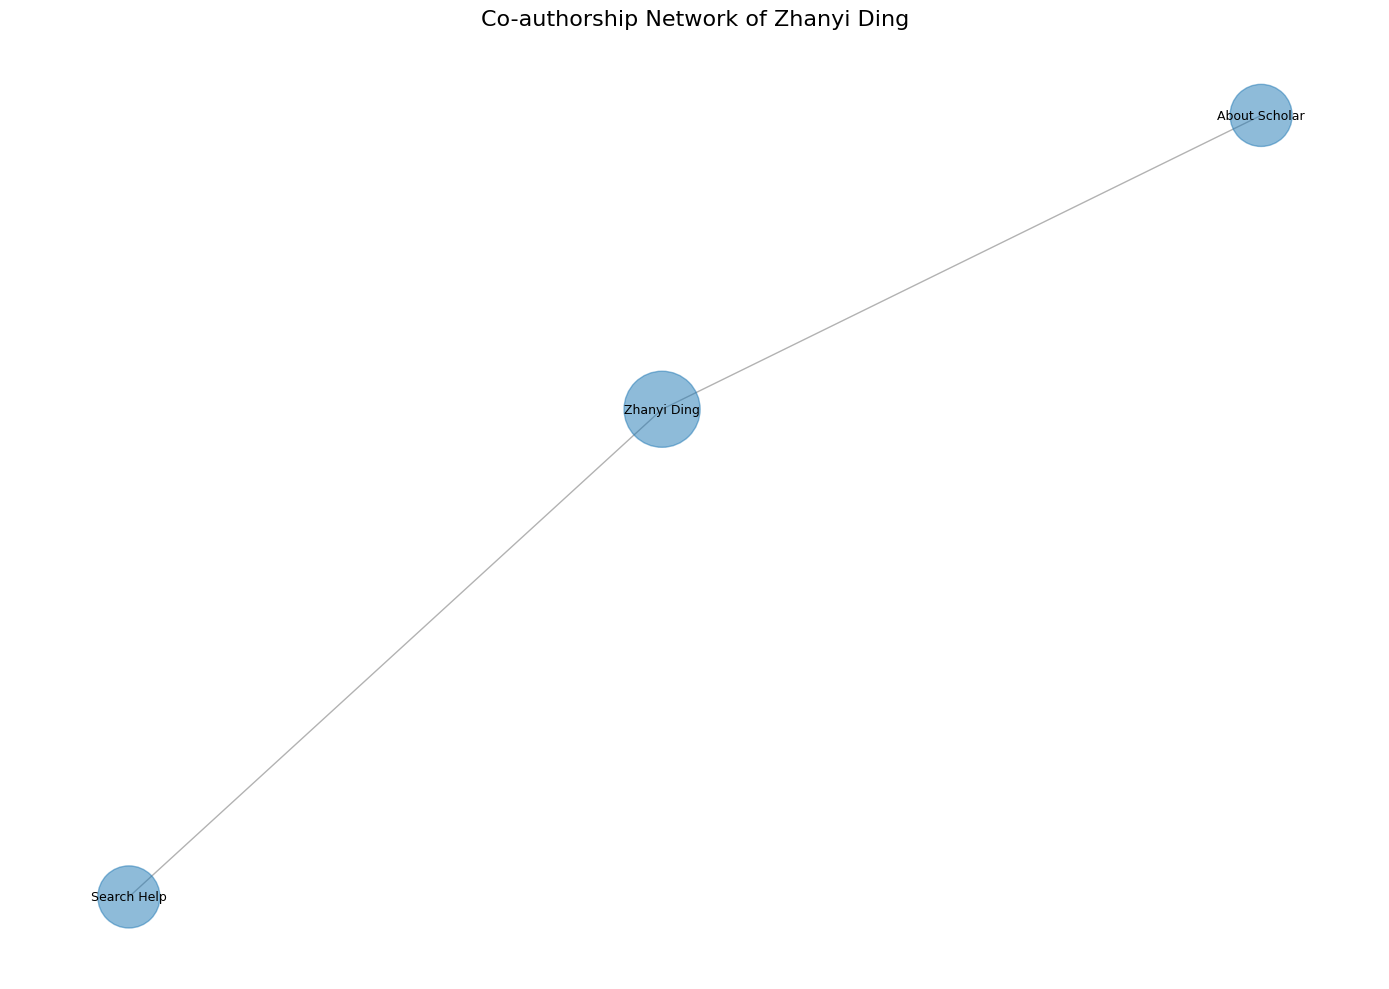

In [ ]:
# ── Visualize network ────────────────────────────
if len(network) > 0:
    fig = plot_coauthors(network, size_labels=9, figsize=(14, 10))
    plt.show()

## 9. Export Results

In [ ]:
# ── Save publications to CSV ─────────────────────
pubs.to_csv("publications.csv", index=False)
print("📁 Saved publications.csv")

# Download from Colab
from google.colab import files
files.download("publications.csv")

📁 Saved publications.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ── Save all results to Excel (multi-sheet) ──────
with pd.ExcelWriter("scholar_report.xlsx") as writer:
    pubs.to_excel(writer, sheet_name="Publications", index=False)
    hist.to_excel(writer, sheet_name="Citation History", index=False)
    positions.to_excel(writer, sheet_name="Author Position", index=False)
    prediction.to_excel(writer, sheet_name="h-index Prediction", index=False)

print("📁 Saved scholar_report.xlsx")
files.download("scholar_report.xlsx")

📁 Saved scholar_report.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 10. NIW Petition Export

Generates `gs_summary.json` and `gs_papers.csv` in the exact format
consumed by the **NIW Petition Skill System** (`vera-niw-assemble`,
`vera-niw-evaluate`, `vera-niw-pillar`).

**What gets built:**
- `gs_summary.json` — profile metrics + papers array + notable citers
- `gs_papers.csv` — flat table with NIW-required columns

**Manual steps after export:**
1. Verify `indexed_in` / `indexed` for each paper (ISI, Scopus, PubMed)
2. Add `notable_citers` entries for government/industry citations (Prong 2 evidence)

In [ ]:
# ── Build gs_summary.json ────────────────────────
import json as _json
from datetime import datetime as _dt

_current_year = _dt.now().year
_last_5 = set(range(_current_year - 4, _current_year + 1))

# ── Last-5-year citation count from citation history ──
cites_last_5 = int(hist[hist["year"].isin(_last_5)]["cites"].sum())

# ── Last-5-year h-index and i10-index from publications ──
_recent = pubs[pubs["year"].isin(_last_5)].copy()
_rc = sorted(_recent["cites"].dropna().astype(int).tolist(), reverse=True)
h_last_5 = 0
for _i, _c in enumerate(_rc, 1):
    if _c >= _i:
        h_last_5 = _i
    else:
        break
i10_last_5 = int((_recent["cites"] >= 10).sum())

# ── Merge first-author flag from positions analysis ──
_first_authored = set()
for idx, row in positions.iterrows():
    if pd.notna(row.get("position")) and row["position"] == 1:
        _first_authored.add(idx)

# ── Build papers array ──
_papers = []
for idx, row in pubs.iterrows():
    _authors_raw = str(row.get("author", ""))
    _co_authors = [a.strip() for a in _authors_raw.split(",") if a.strip()]
    _pubid = str(row.get("pubid", ""))
    _papers.append({
        "title": str(row.get("title", "")),
        "venue": str(row.get("journal", "")),
        "year": int(row["year"]) if pd.notna(row.get("year")) else None,
        "citation_count": int(row["cites"]) if pd.notna(row.get("cites")) else 0,
        "is_first_authored": idx in _first_authored,
        "co_authors": _co_authors,
        "scholar_url": f"https://scholar.google.com/citations?view_op=view_citation&hl=en&user={SCHOLAR_ID}&citation_for_view={SCHOLAR_ID}:{_pubid}",
        "indexed_in": []  # Manual: verify against ISI / Scopus / PubMed
    })

gs_summary = {
    "scholar_id": SCHOLAR_ID,
    "name": profile["name"],
    "total_citations": profile["total_cites"],
    "citations_last_5_years": cites_last_5,
    "h_index": profile["h_index"],
    "h_index_last_5_years": h_last_5,
    "i10_index": profile["i10_index"],
    "i10_index_last_5_years": i10_last_5,
    "papers": _papers,
    "notable_citers": []  # Manual: add government/industry citers for Prong 2
}

with open("gs_summary.json", "w") as _f:
    _json.dump(gs_summary, _f, indent=2)

_n_first = sum(1 for p in _papers if p["is_first_authored"])
print(f"gs_summary.json saved")
print(f"  Scholar:    {gs_summary['name']}")
print(f"  Citations:  {gs_summary['total_citations']:,} (last 5yr: {cites_last_5:,})")
print(f"  h-index:    {gs_summary['h_index']} (last 5yr: {h_last_5})")
print(f"  i10-index:  {gs_summary['i10_index']} (last 5yr: {i10_last_5})")
print(f"  Papers:     {len(_papers)} ({_n_first} first-authored)")

gs_summary.json saved
  Scholar:    Zhanyi Ding
  Citations:  57 (last 5yr: 57)
  h-index:    3 (last 5yr: 3)
  i10-index:  2 (last 5yr: 2)
  Papers:     5 (2 first-authored)


In [ ]:
# ── Build gs_papers.csv ─────────────────────────
gs_papers = pubs[["title", "journal", "year", "cites"]].copy()
gs_papers = gs_papers.rename(columns={"journal": "venue", "cites": "citation_count"})
gs_papers["is_first_authored"] = [i in _first_authored for i in gs_papers.index]
gs_papers["indexed"] = ""  # Manual: verify against ISI / Scopus / PubMed
gs_papers = gs_papers.sort_values("citation_count", ascending=False).reset_index(drop=True)

gs_papers.to_csv("gs_papers.csv", index=False)
print(f"gs_papers.csv saved ({len(gs_papers)} papers)")
print(f"Columns: {list(gs_papers.columns)}")
print()
gs_papers.head(10)

gs_papers.csv saved (5 papers)
Columns: ['title', 'venue', 'year', 'citation_count', 'is_first_authored', 'indexed']



,title,venue,year,citation_count,is_first_authored,indexed
0,Trade-offs between machine learning and deep l...,Scientific Reports,2025,38,True,
1,Employing machine learning and deep learning m...,Computation,2025,16,False,
2,A comparative analysis of deep learning and ma...,,2025,3,False,
3,Beyond keywords: modeling the semantic complex...,Journal of Computational Social Science,2026,0,False,
4,Feature Engineering in the Transformer Era: A ...,Preprints,2025,0,True,


In [ ]:
# ── Download NIW files ───────────────────────────
from google.colab import files
files.download("gs_summary.json")
files.download("gs_papers.csv")

print("Downloaded gs_summary.json + gs_papers.csv")
print()
print("Before filing, manually verify:")
print("  1. indexed_in (JSON) / indexed (CSV)")
print("     Check each venue against ISI Web of Science, Scopus, PubMed")
print("  2. notable_citers in gs_summary.json")
print("     Add government/industry citations — these are Prong 2 evidence")
print("  3. Papers list completeness")
print("     GS may miss some publications; add any missing ones manually")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded gs_summary.json + gs_papers.csv

Before filing, manually verify:
  1. indexed_in (JSON) / indexed (CSV)
     Check each venue against ISI Web of Science, Scopus, PubMed
  2. notable_citers in gs_summary.json
     Add government/industry citations — these are Prong 2 evidence
  3. Papers list completeness
     GS may miss some publications; add any missing ones manually


---

## ⚠️ Rate Limiting Notes

- Google Scholar will block you (HTTP 429) if you make too many requests
- `time.sleep(1)` is added between detail calls — don't remove it
- For bulk operations, add longer delays
- If blocked, wait 5-10 minutes and try again
- Consider `set_scholar_mirror()` for alternative endpoints